<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Example for Optimum Filter and Nonlinear Pulse Fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from qetpy import ofamp, OFnonlin # Import ofamp and OFnonlin from QETpy

Load saved trace and psd from demos/fitting/

In [13]:
psd = np.load('psd.npy')
pulse = np.load('trace.npy')
template = np.load('template.npy')

fs = 625e3
time = np.arange(pulse.shape[-1])/fs

Visualize the pulse and template

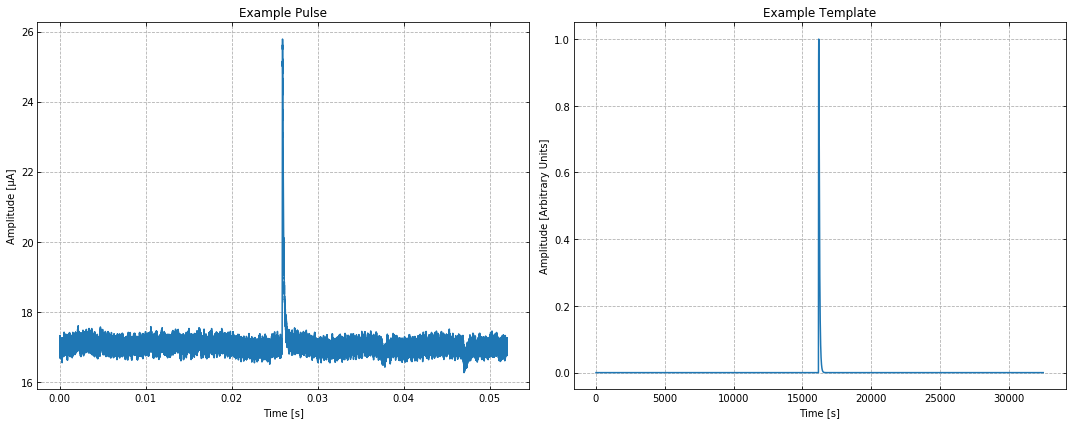

In [38]:


fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].plot(time, pulse*1e6)
ax[0].grid(True, linestyle = '--')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude [μA]')
ax[0].set_title('Example Pulse')
ax[0].tick_params(which="both", direction="in", right=True, top=True)


ax[1].plot(template)
ax[1].grid(True, linestyle = '--')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Amplitude [Arbitrary Units]')
ax[1].set_title('Example Template')
ax[1].tick_params(which="both", direction="in", right=True, top=True)

plt.tight_layout()

Determine the Optimum Filter best fit amplitude 

In [21]:
ofamp?

We will constrain the OF to only search a window of 100 bins of the given template. We also use the ```lgcsigma = True``` flag to give us the estimate theoretical resolution given this template and psd

In [25]:
psd.shape

(32500,)

In [47]:
amp, t0, chi2, sigma = ofamp(signal= pulse, template= template, psd= psd, fs= fs, withdelay= True, 
      lgcsigma= True, nconstrain= 100)

In [43]:
print(f'The resolution is: {sigma: .3e} Amps')

The resolution is:  2.966e-09 Amps


Visualize the fit

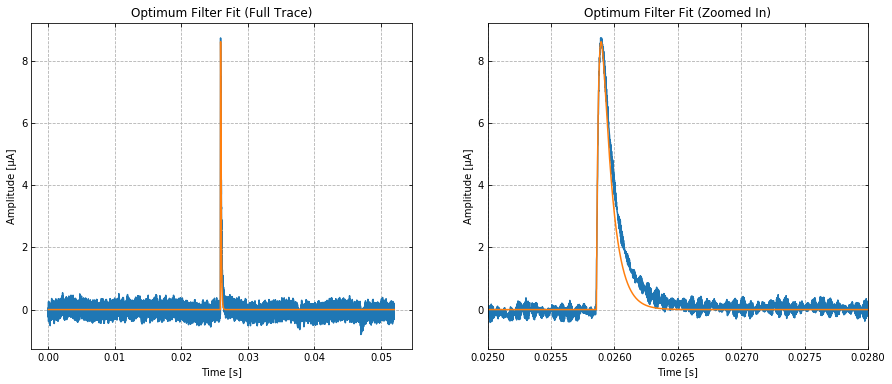

In [40]:
fig, ax = plt.subplots(1,2, figsize = (15, 6))
ax[0].plot(time, (pulse - np.mean(pulse[:10000]))*1e6)
ax[0].plot(time, amp* np.roll(template, int(t0*fs))*1e6)
ax[0].set_ylabel('Amplitude [μA]')
ax[0].set_xlabel('Time [s]')
ax[0].set_title('Optimum Filter Fit (Full Trace)')
ax[0].grid(True, linestyle = '--')
ax[0].tick_params(which="both", direction="in", right=True, top=True)

ax[1].plot(time, (pulse - np.mean(pulse[:10000]))*1e6)
ax[1].plot(time, amp* np.roll(template, int(t0*fs))*1e6)
ax[1].set_xlim(.025, .028)
ax[1].set_ylabel('Amplitude [μA]')
ax[1].set_xlabel('Time [s]')
ax[1].set_title('Optimum Filter Fit (Zoomed In)')
ax[1].grid(True, linestyle = '--')
ax[1].tick_params(which="both", direction="in", right=True, top=True)


The template doesn't match the pulse very well. Let us now fit the fall time using ```OFnonlin```

In [7]:
OFnonlin?

In [8]:
OFnonlin.fit_falltimes?

 Use the parameter
 
 ```lgcplot = True```
 
 to plot the fit in frequency domain and time domain

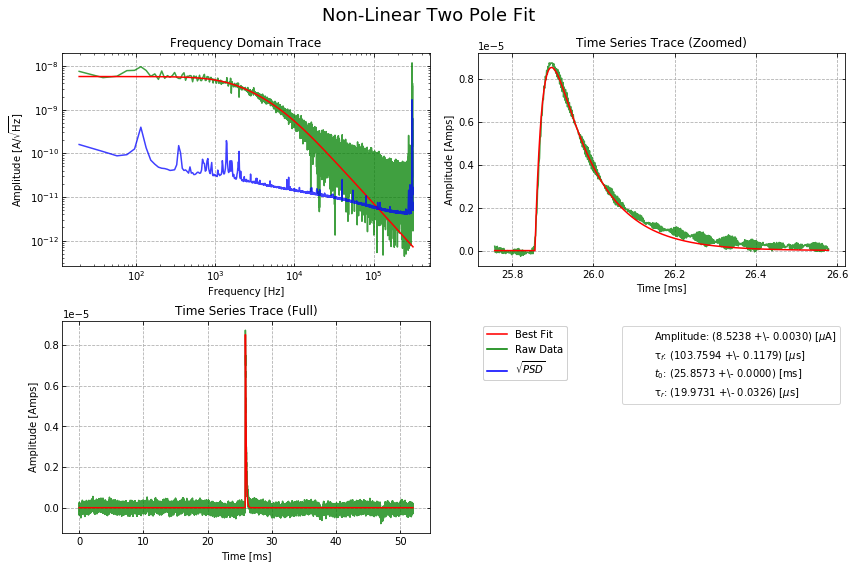

In [46]:
nonlinof = OFnonlin(psd = psd, fs = 625e3, template=None)
params, error, _, chi2_nonlin = nonlinof.fit_falltimes(pulse, lgcdouble = True, taurise = 20e-6,
                                                  lgcfullrtn = True, lgcplot = True)

In [58]:
print(f'χ^2 per DOF for regular OF: {chi2/pulse.shape[-1]}')
print(f'χ^2 per DOF for nonlinear OF: {chi2_nonlin}')

χ^2 per DOF for regular OF: 66.17069121588709
χ^2 per DOF for nonlinear OF: 62.565865677997195
